# Artificial Intelligence course - UFAZ L3
## Practical Work 4 : Artificial Neural Network training, from scratch
### Asif Mammadov, Mariam Babayeva

#### Since you are dealing with a classification problem, what activation function will you use for your output layer ?
Softmax function is the best suited for the output layer.

#### What cost function is available to you ?
We implemented Mean Square Error and Cross Entropy cost functions.

#### What proportion of the data are held for training ? for testing ?
We took 70% of data for training and 30% for testing. 

#### What is contained in X train (resp. X test) and Y train (resp. Y test) ?
X variables represent the input matrix for our Neural Network. It consists of attribute values of a dataset.
Y variables represent the output (label) for the dataset.
X_train are inputs for training set. X_test are inputs for test sets. Y_train and Y_test follow the same pattern.

#### What is an epoch of training ?
In epoch training we divide the training data into chunks, called batches. The cycle of training these batches is called an epoch. 
Epoch is the full cycle of feeding the neural network with training data. We can use multiple epoch training for the network to make better generalization of data [1]


#### Say we want to train on batches of size n. How will you implement an epoch of training ?
We divide the whole dataset into len(dataset) / n batches of size n. Each batch training is called an iteration. So the epoch training will consist of several iterations with batches of size n.

#### We know how to measure the error between our predictions and the expected labels on the output label. Do we have target values for the hidden units ? How can we update the parameters on those hidden units ?
The simplest way is to just subtract predicted value to the expected one. Of course there are many other error functions, also called cost functions, such as Mean Squared Error or Cross Entropy Loss. Our error depends on many parameters, including weights and biases in the hidden layers of network. To update them we use backpropagation with Gradient Descent.

[1] https://deepai.org/machine-learning-glossary-and-terms/epoch


In [1]:
import numpy as np
import pandas as pd
import matplotlib
from mlp import utils
from mlp.neuralNetwork import NeuralNetwork
from mlp.activation import Sigmoid, Relu, Tanh
from mlp.cost import MSE, CrossEntropy
matplotlib.rcParams['figure.figsize'] = [10, 8]

In [2]:
df = pd.read_csv('Iris.csv')
X = utils.loadAttributes(df, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"])
Y = utils.createOneHot(df, "Species")

In [3]:
X_train, Y_train, X_test, Y_test = utils.split_train_test(X, Y, test_portion=0.3)

#### Manual epoch training

In [4]:
nn = NeuralNetwork(X_train, Y_train, lr=0.05, cost=MSE, batch_size=4, normalization=None)
nn.add_hidden_layer(5, Relu)
nn.info()

N Training instances: 105
N attributes: 4
Batch size: 4 
Learning rate: 0.05
Cost function:<class 'mlp.cost.MSE'>
Normalization:None

Architecutre:
Layer 0: 4 nodes
Layer 1: 5 nodes | <class 'mlp.activation.Relu'>
Layer 2: 3 nodes | <class 'mlp.activation.Sigmoid'>


In [5]:
nn.train(n_epochs=50, verbose=True)

-------------------- Epoch 0: --------------------
Batch 0: Error : 0.37514281029791047
Batch 1: Error : 0.3750777170844787
Batch 2: Error : 0.37423043246587717
Batch 3: Error : 0.3746907590015731
Batch 4: Error : 0.37428632179759774
Batch 5: Error : 0.3739194287082262
Batch 6: Error : 0.3731104168238075
Batch 7: Error : 0.3733281389759989
Batch 8: Error : 0.3740305120059324
Batch 9: Error : 0.37236965537468814
Batch 10: Error : 0.3725049038294886
Batch 11: Error : 0.37211907742750916
Batch 12: Error : 0.3724854483232305
Batch 13: Error : 0.3713902722667043
Batch 14: Error : 0.3697872417850343
Batch 15: Error : 0.37194583638067635
Batch 16: Error : 0.3715206297568967
Batch 17: Error : 0.3710150939638146
Batch 18: Error : 0.3694084368054331
Batch 19: Error : 0.3686092244343313
Batch 20: Error : 0.3680891921016838
Batch 21: Error : 0.3722772209283398
Batch 22: Error : 0.3713759112859901
Batch 23: Error : 0.3706781762767566
Batch 24: Error : 0.368227170715787
Batch 25: Error : 0.370120419

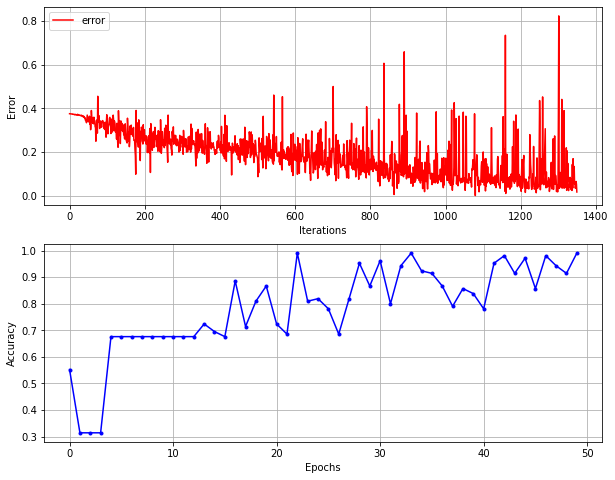

In [6]:
nn.plot_stats()

In [7]:
conf_matrix = nn.testPrediction(X_test, Y_test, verbose=False)
print("-" * 20, "Test set prediction result", "-" * 20)
print("Confusion matrix:\n {}".format(conf_matrix))
print("Accuracy: {}".format(utils.get_accuracy(conf_matrix)))


-------------------- Test set prediction result --------------------
Confusion matrix:
 [[12.  0.  0.]
 [ 0. 14.  2.]
 [ 0.  0. 17.]]
Accuracy: 0.9555555555555556


#### Autonomous epoch training

In [8]:
nn_auto = NeuralNetwork(X_train, Y_train, lr=0.05, cost=MSE, batch_size=4, normalization=None)
nn_auto.add_hidden_layer(5, Relu)
nn_auto.info()

N Training instances: 105
N attributes: 4
Batch size: 4 
Learning rate: 0.05
Cost function:<class 'mlp.cost.MSE'>
Normalization:None

Architecutre:
Layer 0: 4 nodes
Layer 1: 5 nodes | <class 'mlp.activation.Relu'>
Layer 2: 3 nodes | <class 'mlp.activation.Sigmoid'>


In [9]:
nn_auto.train(verbose=True)

-------------------- Epoch 0: --------------------
Batch 0: Error : 0.3751738172752841
Batch 1: Error : 0.37511242231451164
Batch 2: Error : 0.37467207262517843
Batch 3: Error : 0.3736353917424494
Batch 4: Error : 0.3748463743851437
Batch 5: Error : 0.3738457267682882
Batch 6: Error : 0.37307062924848666
Batch 7: Error : 0.3738708584952888
Batch 8: Error : 0.37497496353455584
Batch 9: Error : 0.3724774732448928
Batch 10: Error : 0.37274101204985516
Batch 11: Error : 0.37312478641253144
Batch 12: Error : 0.3720022908120847
Batch 13: Error : 0.37200143291529303
Batch 14: Error : 0.3713159115605058
Batch 15: Error : 0.3713097317869414
Batch 16: Error : 0.37144669430518007
Batch 17: Error : 0.3704168283182829
Batch 18: Error : 0.3700917674079729
Batch 19: Error : 0.36999521326608353
Batch 20: Error : 0.3694335973953945
Batch 21: Error : 0.36926382925114476
Batch 22: Error : 0.3689507850605546
Batch 23: Error : 0.36837424515765416
Batch 24: Error : 0.36811766522309486
Batch 25: Error : 0.36

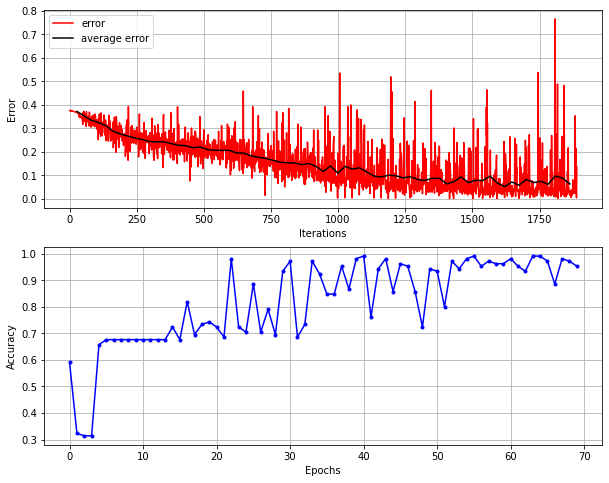

In [10]:
nn_auto.plot_stats()

In [11]:
conf_matrix = nn_auto.testPrediction(X_test, Y_test, verbose=False)
print("-" * 20, "Test set prediction result", "-" * 20)
print("Confusion matrix:\n {}".format(conf_matrix))
print("Accuracy: {}".format(utils.get_accuracy(conf_matrix)))

-------------------- Test set prediction result --------------------
Confusion matrix:
 [[12.  0.  0.]
 [ 0. 13.  3.]
 [ 0.  0. 17.]]
Accuracy: 0.9333333333333333
